# Loan Application Status Prediction

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc

# Importing the Libraries & Dataset:-

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Importing the required Libraries to perform EDA

In [121]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

# Importing the Dataset into Python from the system

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [122]:
loan_application=pd.DataFrame(data=df)
loan_application

# Making a Structured Dataframe of the Dataset and saving it in variable "loan_application"

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA (Exploratory Data Analysis):-

In [123]:
loan_application.columns

# Displaying all the column names present in the loan application dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
loan_application.shape

# Displaying rows and columns of dataset

(614, 13)

In [125]:
loan_application.info()

# The information regarding the data types and null values present in the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking Null Values:-

In [126]:
loan_application.isnull().sum()

# checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many null values present in the dataset

<AxesSubplot:>

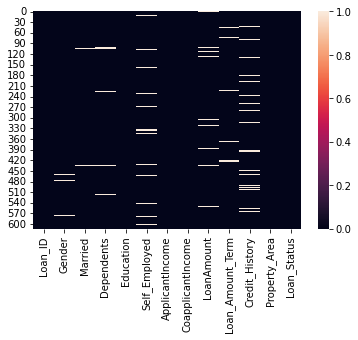

In [127]:
# Checking null values using graph
sns.heatmap(loan_application.isnull())

The heatmap showing missing values in white colors and indicating its integer location in the dataset

# Treating null values

In [128]:
loan_application["Gender"]=loan_application['Gender'].fillna(loan_application['Gender'].mode()[0])
loan_application["Married"]=loan_application['Married'].fillna(loan_application['Married'].mode()[0])
loan_application["Dependents"]=loan_application['Dependents'].fillna(loan_application['Dependents'].mode()[0])
loan_application["Self_Employed"]=loan_application['Self_Employed'].fillna(loan_application['Self_Employed'].mode()[0])
loan_application["LoanAmount"]=loan_application['LoanAmount'].fillna(loan_application['LoanAmount'].median())
loan_application["Loan_Amount_Term"]=loan_application['Loan_Amount_Term'].fillna(loan_application['Loan_Amount_Term'].median())
loan_application["Credit_History"]=loan_application['Credit_History'].fillna(loan_application['Credit_History'].median())

# Filling the Missing values with median and mode to treat the null values

In [129]:
loan_application.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see now we dont have any missing values left and all null values are treated

<AxesSubplot:xlabel='Gender', ylabel='count'>

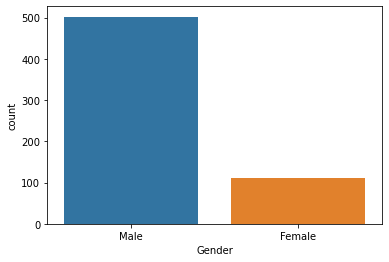

In [130]:
sns.countplot(loan_application["Gender"])

# Graphical representation showing Gender in the Dataset


The Graph shows that Almost 5 times male applicants are their than female applicants

<AxesSubplot:xlabel='Married', ylabel='count'>

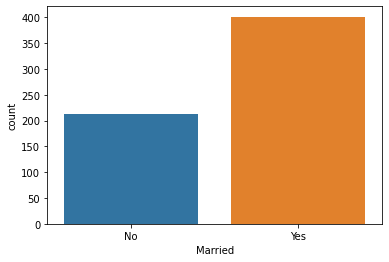

In [131]:
sns.countplot(loan_application["Married"])

# Graphical representation showing marital status in the Dataset


The Graph shows that most people who applied for loan are married

<AxesSubplot:xlabel='Married', ylabel='count'>

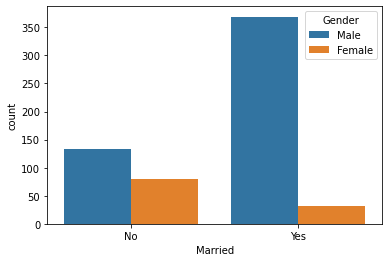

In [132]:
sns.countplot(loan_application["Married"],hue=loan_application["Gender"])

# The Graphical representation shows that most males are married who are applying for loan


 Mostly unmarried females apply for loan and very few married females are their

<AxesSubplot:xlabel='Dependents', ylabel='count'>

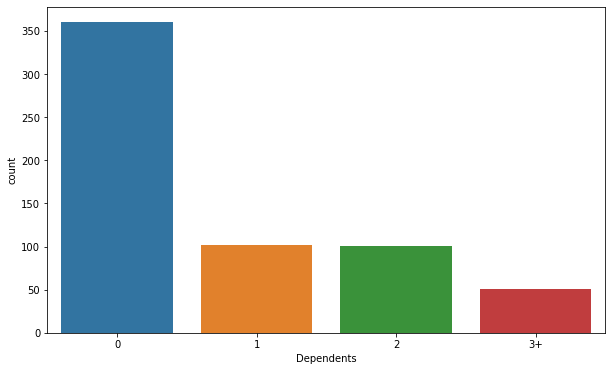

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(loan_application["Dependents"])

# The Graphical representation shows that most people who have applied for loan do not have any dependents


It shows that most of the person are independents as compare to dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

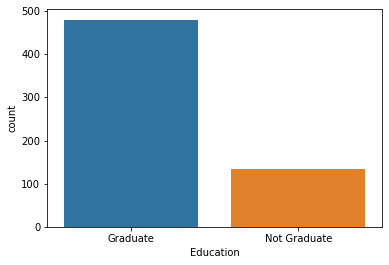

In [134]:
sns.countplot(loan_application["Education"])

# The Graphical representation shows that most people who have applied for loan are graduate and very few are not graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

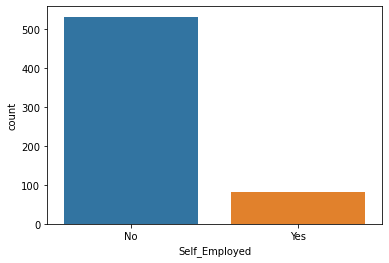

In [135]:
sns.countplot(loan_application["Self_Employed"])

# Graphical Representation showing very few loan applicants are self employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

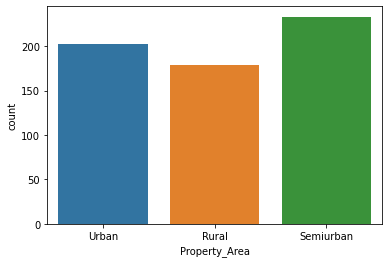

In [136]:
sns.countplot(loan_application["Property_Area"])

# Graphical representation showing the Property location 

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

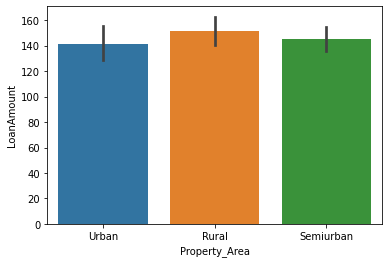

In [137]:
sns.barplot(x=loan_application["Property_Area"],y=loan_application["LoanAmount"])

# Graphical representation shows that more loan applicants have applied for loan for rural area property 

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

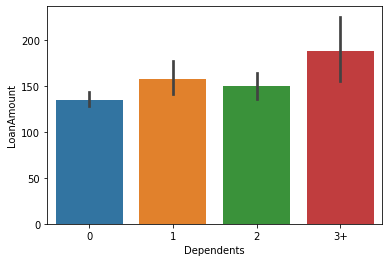

In [138]:
sns.barplot(x=loan_application["Dependents"],y=loan_application["LoanAmount"])

# The graphical representation shows that loan applicants who have taken higher loan amount has more number of dependents

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

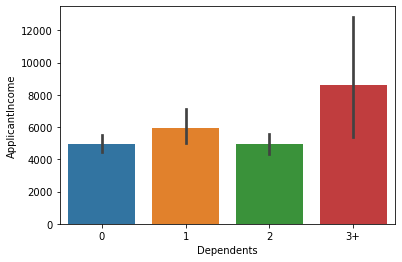

In [139]:
sns.barplot(x=loan_application["Dependents"],y=loan_application["ApplicantIncome"])

# Graphical representation shows that applicants with more dependents have higher income so as to manage a bigger family
# That is why applicants with higher income and more dependents can apply for higher amount of loans

<AxesSubplot:xlabel='Dependents', ylabel='CoapplicantIncome'>

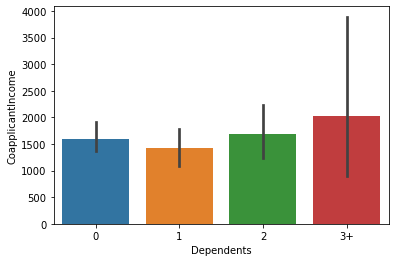

In [140]:
sns.barplot(x=loan_application["Dependents"],y=loan_application["CoapplicantIncome"])

# Graphical representation shows that Cpapplicants with more dependents have higher income

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

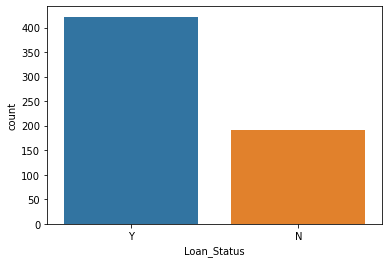

In [141]:
sns.countplot(loan_application["Loan_Status"])

# There are more than double loan applicants who are getting loan approved 

In [142]:
loan_application['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Descriptive Analysis :-

In [143]:
# Now checking  features description.
loan_application.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Key Observations :-
    
Applicateincome show that there is high difference in mean and median of columns and also there is high standard deviation.Mean is very high than median which means high skewness is also present and also there is a lot of differnce in 75th percentile and 100th percentile.

Same Coapplicantincome is also having a lot of diffenence.

# Checking Distribution of Dataset :-

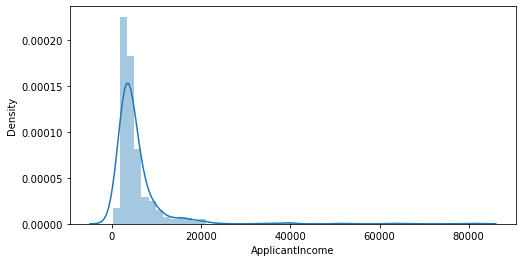

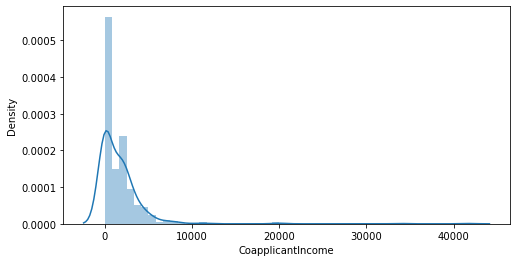

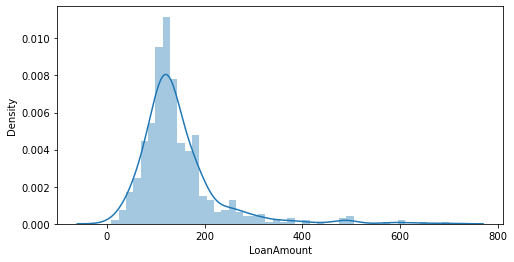

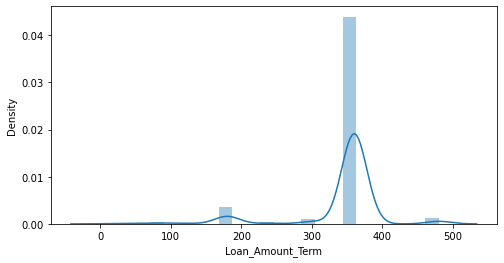

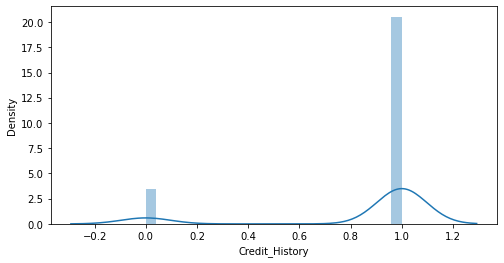

In [144]:
for i in loan_application.columns:
    if loan_application[i].dtypes!='object':
        plt.figure(figsize=(8,4))
        sns.distplot(loan_application[i])

Loan amount is not normally distributed. It shows that there is high number of loans in low range while a few are high amount loans.

Skewness is present in all columns.

# Checking relation between Features and Label :-

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

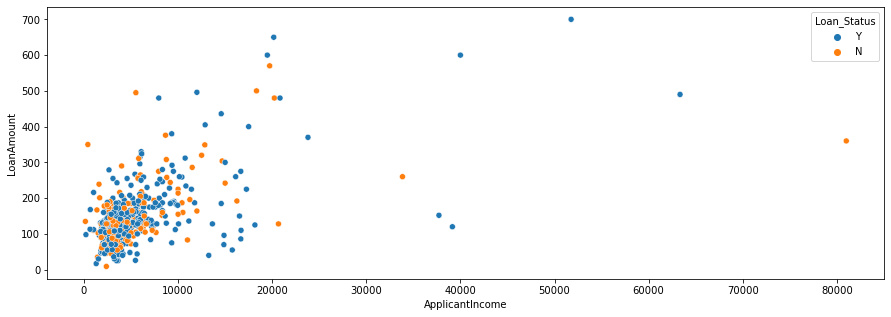

In [145]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='ApplicantIncome' ,y='LoanAmount',hue='Loan_Status',data=loan_application)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

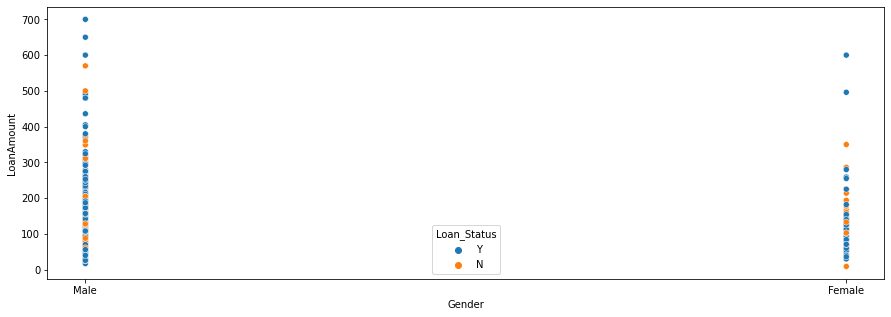

In [146]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Gender' ,y='LoanAmount',hue='Loan_Status',data=loan_application)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

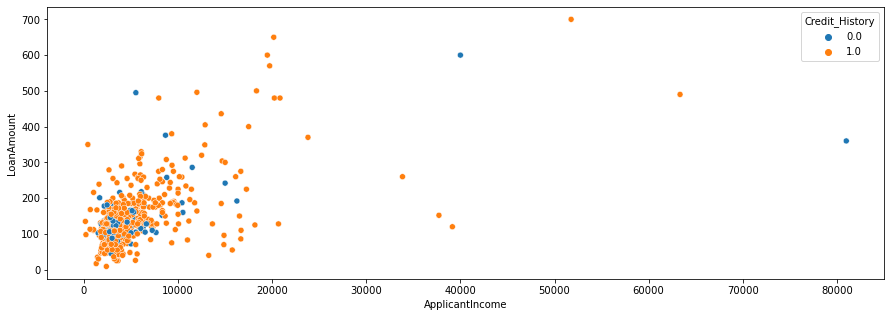

In [147]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='ApplicantIncome' ,y='LoanAmount',hue='Credit_History',data=loan_application)

# Label Encoding:-

In [148]:
loan_application.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [149]:
from sklearn.preprocessing import LabelEncoder

# Importing the Label Encoder from Sklearn Library

In [150]:
le=LabelEncoder()

In [151]:
for i in loan_application.columns:
    if loan_application[i].dtypes=="object":
        loan_application[i]=le.fit_transform(loan_application[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in loan application dataset

In [152]:

loan_application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Checking Correlation:-

In [153]:
loan_application_corr=loan_application.corr()
loan_application_corr

# Showing the Correlation between all the independent variable and target variable

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


<AxesSubplot:>

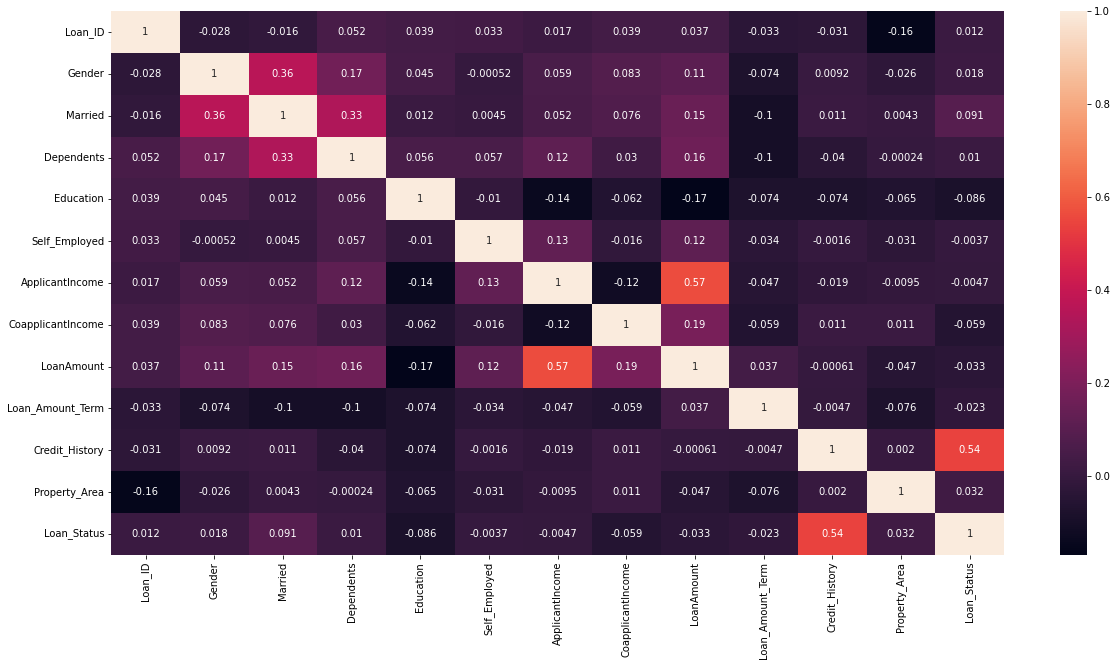

In [154]:
plt.figure(figsize=(20,10))
sns.heatmap(loan_application_corr,annot=True,annot_kws={'size':10})

# Graphical Representation showing the Correlation between all the independent variable and target variable

In [155]:
corr=loan_application.corr()
corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

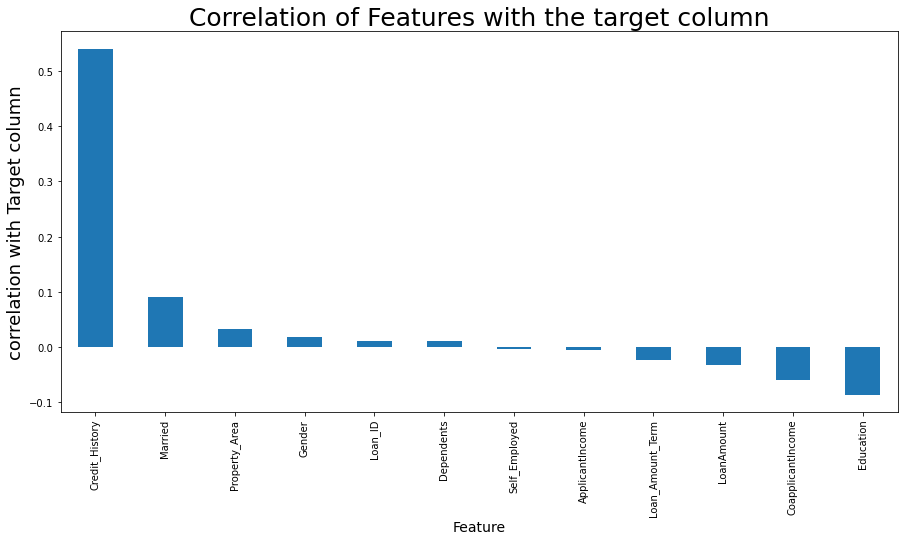

In [156]:
plt.figure(figsize=(15,7))
loan_application.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_Status"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

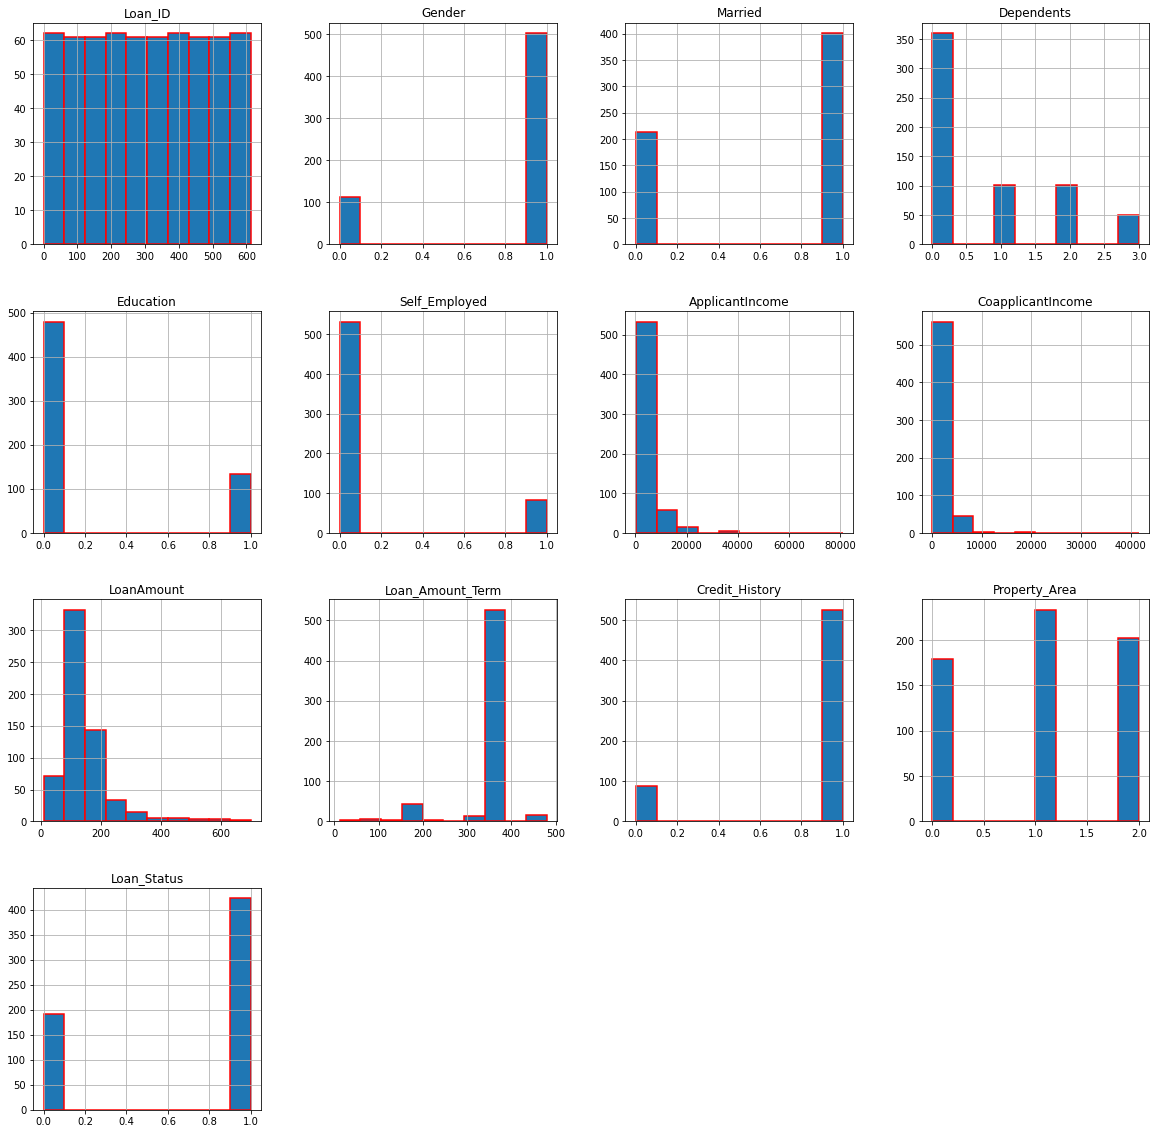

In [157]:
loan_application.hist(layout=(4,4),edgecolor="red",linewidth= 1.5,figsize=(20,20),bins=10,grid=True)
plt.show()

# Multivariate Analysis:-

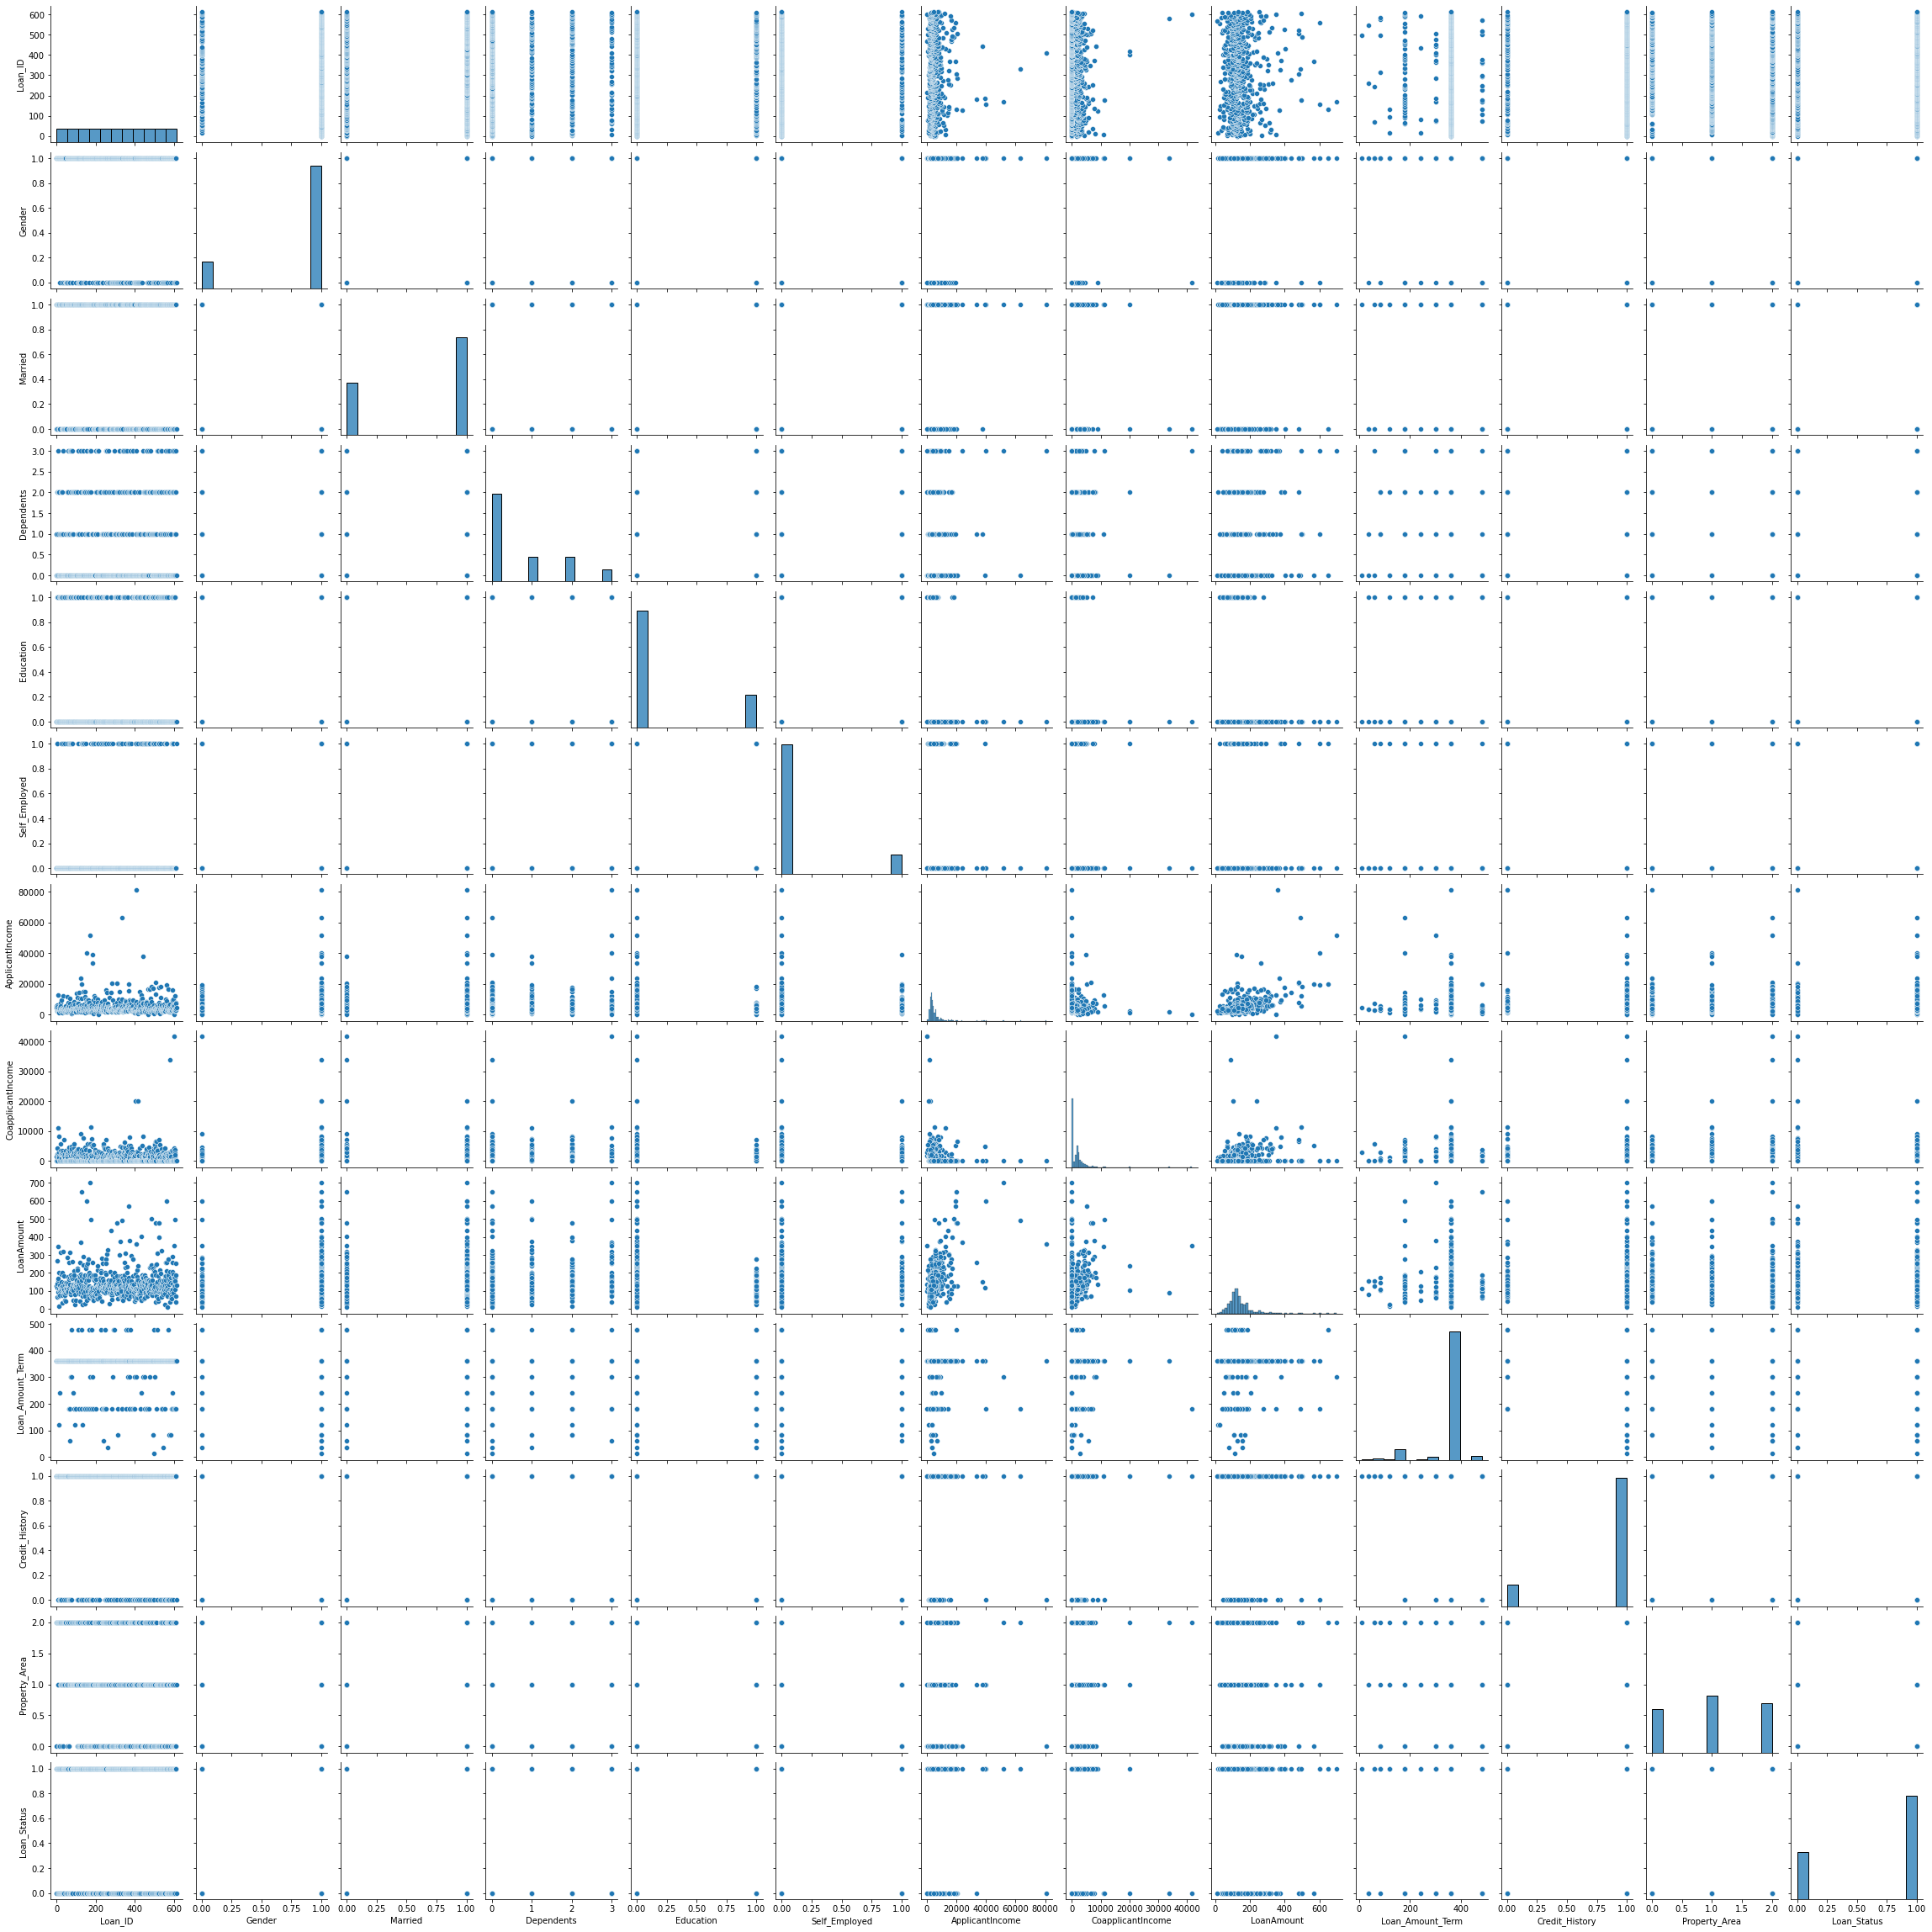

In [158]:
sns.pairplot(loan_application)

# It is showing the correlation of each variable with others in graphical presentation

# Checking Skewness:-

In [159]:
loan_application.skew()

# Checking the skewness of the loan_application dataset 

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Checking Outliers:-

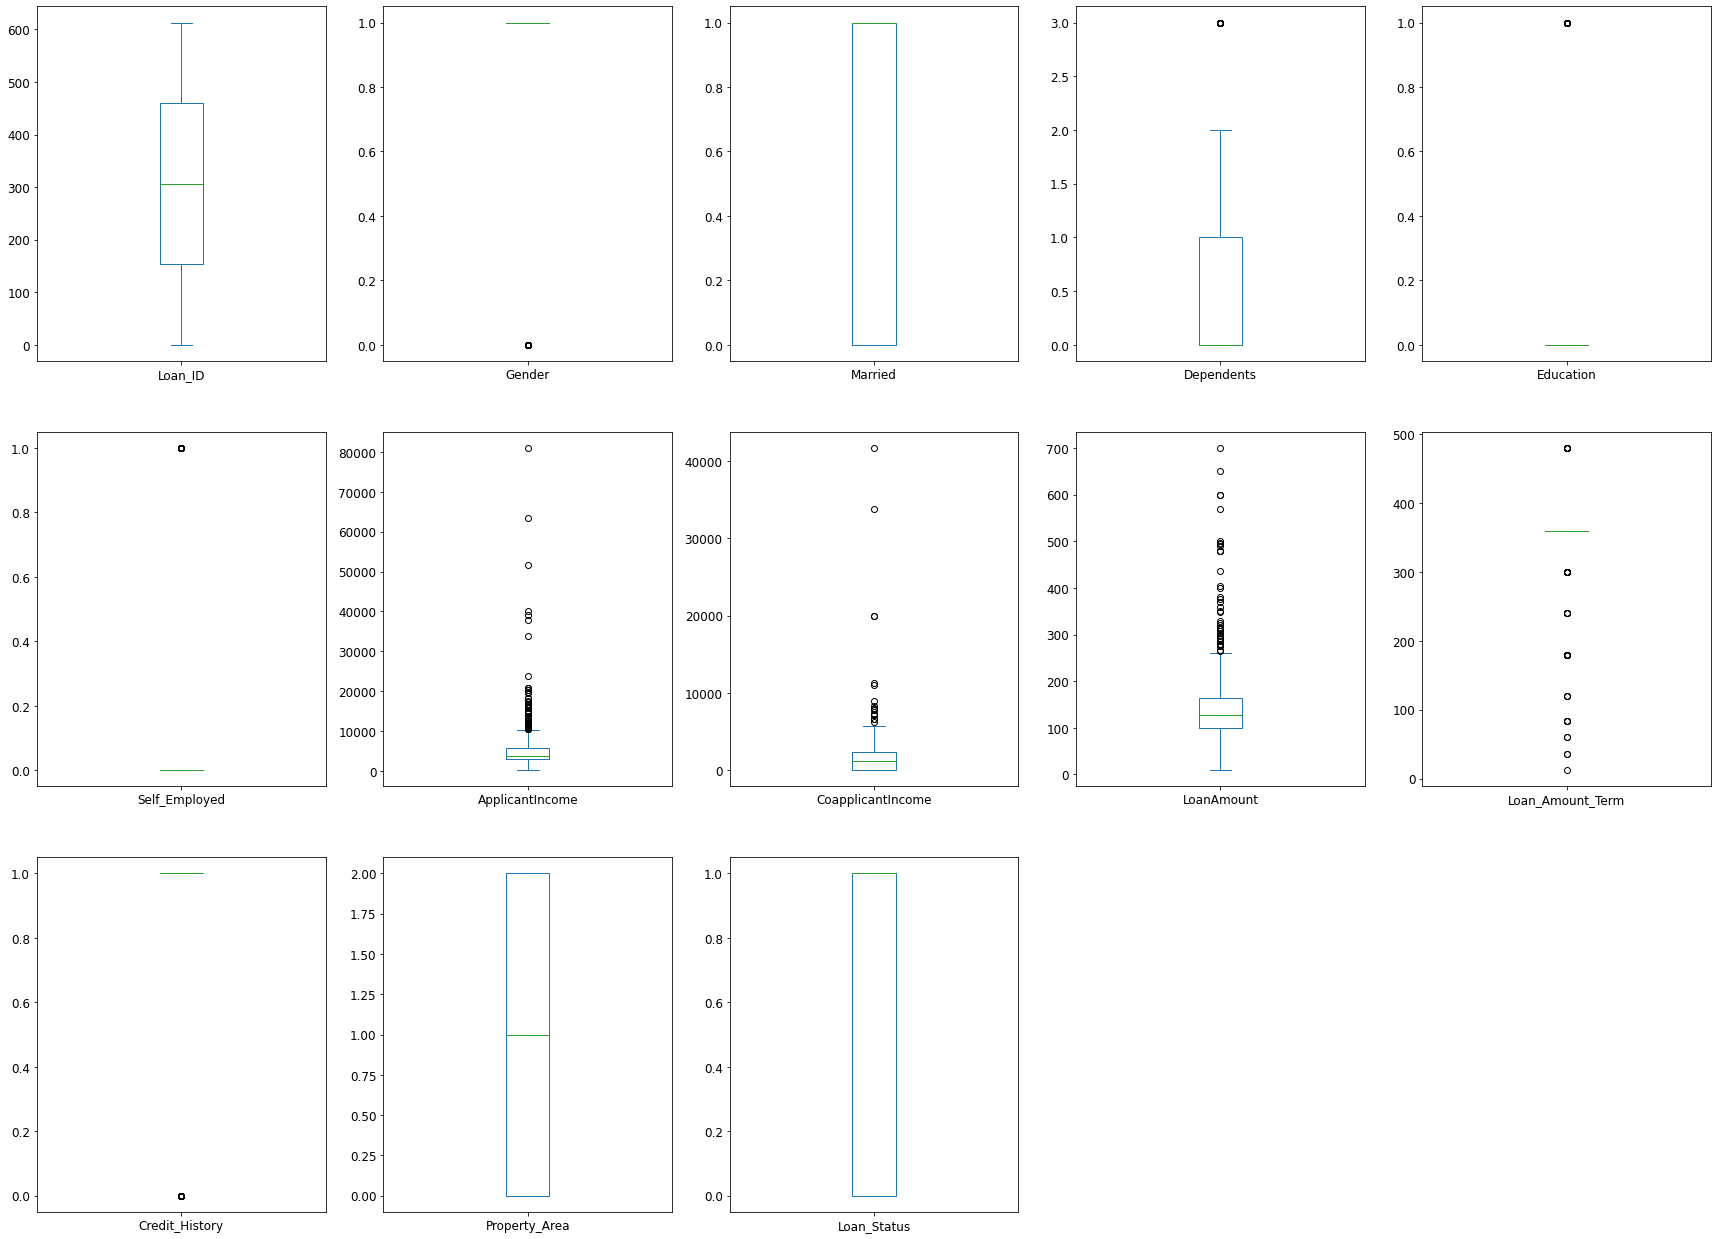

In [160]:
loan_application.plot(kind="box", subplots=True, layout=(4,5), figsize=(30,30), fontsize=12)
plt.show()

The Boxplots showing many outlier values present in the different columns of the dataset

# Data Cleaning:-

In [161]:
loan_application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [162]:
# Dropping Loan id as this is not giving any information.
loan_application.drop(['Loan_ID'],axis=1,inplace=True)

# Outlier Treatment:-

In [163]:
from scipy.stats import zscore

# Importing zscore function to detect outliers from scipy Library

In [164]:
z=np.abs(zscore(loan_application))
z

# Taking absolute of all the z score values so that negative values also become positive ones

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733,1.223298,0.674519


In [165]:
print(np.where(z>3))

# Printing all the integer locations of all the values where the z score value is above +3 Stanard Deviation
# These points determine the outliers present in the dataset

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [166]:
loan_application_new=loan_application[(z<3).all(axis=1)]
loan_application_new

# Taking all the values which are under +3 Standard Deviation into new Data Frame "loan_application_new"
# This dataset contains all the values and outliers are removed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [167]:
loan_application.shape,loan_application_new.shape

((614, 12), (577, 12))

In [168]:
data_loss=((614-577)/614)*100
data_loss

# Checking the Data loss is of 6.02% sowe are removing outliers

6.026058631921824

# Skewness Treatment :-

In [169]:
loan_application.skew()

# Checking the Skewness of the Dataset

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [170]:
x=loan_application_new.iloc[:,0:-1]
x

# Taking all the independent variables into x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [171]:
y=loan_application_new.iloc[:,-1]
y

# Taking the target variable into y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [172]:
from sklearn.preprocessing import power_transform

# Importing power transform function from Sklearn Library 

In [173]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying Power Transform function and making a new dataframe df_new from it
# df_new contains the data without skewness

In [174]:
x.skew()

# Displaying the improved Skewness

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [175]:
x=df_new
x.skew()

# Saving the df_new into main loan_application variable

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

In [176]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.130788,0.418513,1.194806


In [177]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

# Model Building using Logistic Regression:-

Finding Best Random State:-

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Importing the Algorithm and Evolution Matrix to perform Classification

In [179]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.9172413793103448 on Random State  494


In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=494)

In [181]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

# Training the Logistic Regression Model

LogisticRegression()

In [182]:
lr_pred=lr.predict(x_test)
lr_pred

# The Logistic Regression Model predicting values based on training

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [183]:
accuracy_score(y_test,lr_pred)

0.9172413793103448

In [184]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

# Accuracy Score and Evolution Matrix of Logistic Regression Model

[[ 20  12]
 [  0 113]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        32
           1       0.90      1.00      0.95       113

    accuracy                           0.92       145
   macro avg       0.95      0.81      0.86       145
weighted avg       0.93      0.92      0.91       145



In [185]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [186]:
auc_score=roc_auc_score(y_test,lr_pred)
auc_score

0.8125

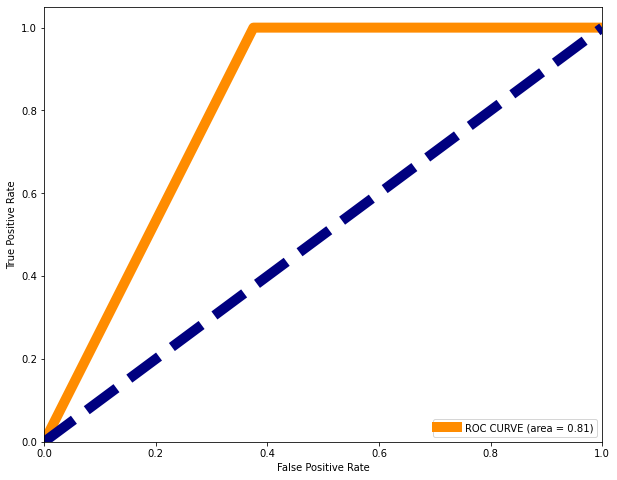

In [187]:
fpr,tpr,thresholds=roc_curve(y_test,lr_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Model Building using other Classifiers:-

# Decision Tree Classifier:-

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.8137931034482758 on Random State  102


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=102)

In [191]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Training the Decision Tree Classifier Model

DecisionTreeClassifier()

In [192]:
dtc_pred=dtc.predict(x_test)
dtc_pred

# The Decision Tree Classifier Model is predicting values based on training

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [193]:
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

# Accuracy Score and Evolution Matrix of Decision Tree Classifier Model

0.7931034482758621
[[31 18]
 [12 84]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        49
           1       0.82      0.88      0.85        96

    accuracy                           0.79       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.79      0.79      0.79       145



In [194]:
auc_score=roc_auc_score(y_test,dtc_pred)
auc_score

0.7538265306122449

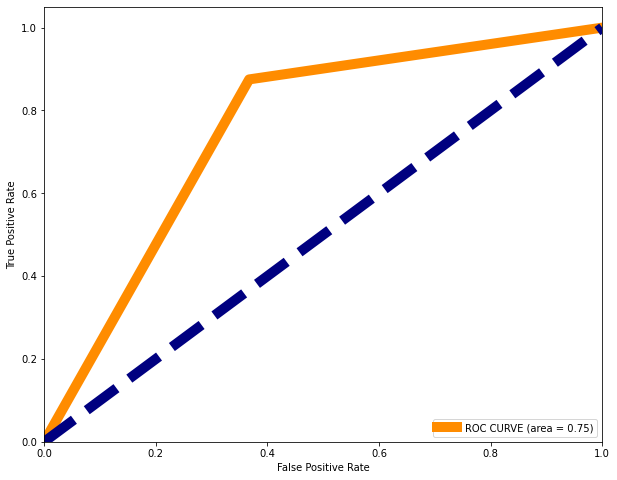

In [195]:
fpr,tpr,thresholds=roc_curve(y_test,dtc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier:-

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc_train=rfc.predict(x_train)
    predrfc_test=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.903448275862069 on Random State  494


In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=494)

In [199]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

# Training the Random Forest Classifier Model

RandomForestClassifier()

In [200]:
rfc_pred=rfc.predict(x_test)
rfc_pred

# The Random Forest Classifier Model is predicting values based on training

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [201]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

# Accuracy Score and Evolution Matrix of Random Classifier Model

0.896551724137931
[[ 22  10]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.92      0.96      0.94       113

    accuracy                           0.90       145
   macro avg       0.87      0.82      0.84       145
weighted avg       0.89      0.90      0.89       145



In [202]:
auc_score=roc_auc_score(y_test,rfc_pred)
auc_score

0.8216261061946903

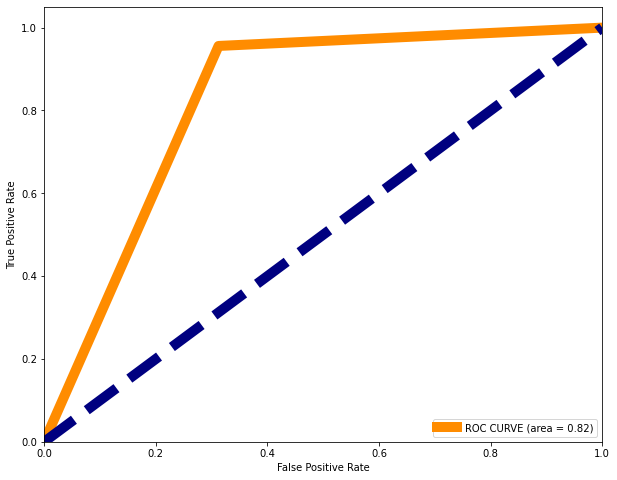

In [203]:
fpr,tpr,thresholds=roc_curve(y_test,rfc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# K Neighbors Classifier:-

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    predknn_train=knn.predict(x_train)
    predknn_test=knn.predict(x_test)
    acc=accuracy_score(y_test,predknn_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

# Finding the Best Random State with maximum Accuracy Score

Best Accuracy is  0.8827586206896552 on Random State  261


In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=261)

In [207]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

# Training the K Neighbors Classifier Model

KNeighborsClassifier()

In [208]:
knn_pred=knn.predict(x_test)
knn_pred

# The K Neighbors Classifier Model is predicting values based on training

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [209]:

print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

# Accuracy Score and Evolution Matrix of K Neighbors Classifier Model

0.8827586206896552
[[ 22  13]
 [  4 106]]
              precision    recall  f1-score   support

           0       0.85      0.63      0.72        35
           1       0.89      0.96      0.93       110

    accuracy                           0.88       145
   macro avg       0.87      0.80      0.82       145
weighted avg       0.88      0.88      0.88       145



In [210]:
auc_score=roc_auc_score(y_test,knn_pred)
auc_score

0.7961038961038961

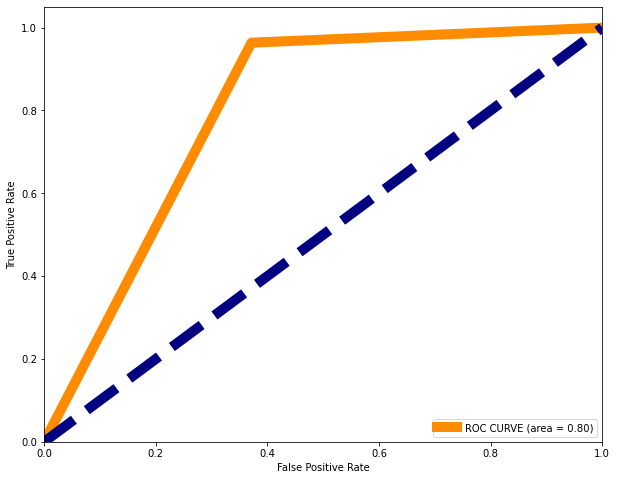

In [211]:
fpr,tpr,thresholds=roc_curve(y_test,knn_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Extra Trees Classifier:-

In [212]:
from sklearn.ensemble import ExtraTreesClassifier

# Importing the Extra Trees Classifier Model

In [213]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    pred_etc_train=etc.predict(x_train)
    pred_etc_test=etc.predict(x_test)
    acc=accuracy_score(y_test,pred_etc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8827586206896552 on Random State  494


In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=494)

In [215]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

# Training the Extra Trees Classifier Model

ExtraTreesClassifier()

In [216]:
etc.score(x_train,y_train)

# Score of the Extra Trees Classifier Model

1.0

In [217]:
etc_pred=etc.predict(x_test)
etc_pred

# The Extra Trees Classifier Model is predicting the values based on training

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [218]:
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

# Evolution Matrix of the Extra Trees Classifier Algorithm

0.8689655172413793
[[ 22  10]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.91      0.92      0.92       113

    accuracy                           0.87       145
   macro avg       0.81      0.80      0.81       145
weighted avg       0.87      0.87      0.87       145



In [219]:
auc_score=roc_auc_score(y_test,etc_pred)
auc_score

0.8039269911504425

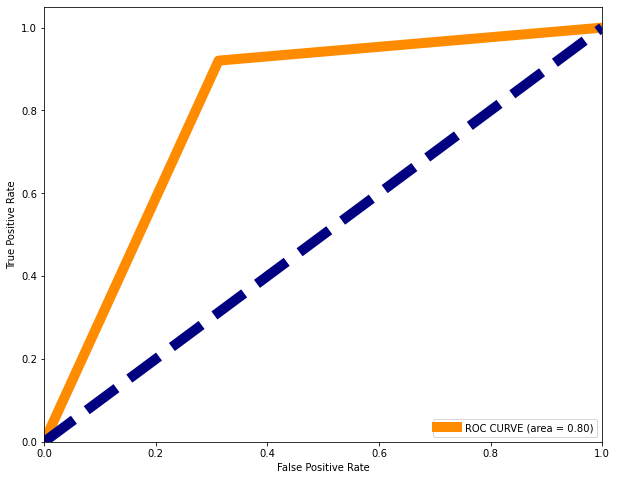

In [220]:
fpr,tpr,thresholds=roc_curve(y_test,etc_pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Cross Validation:-

In [221]:
from sklearn.model_selection import cross_val_score

# Importing the Cross Validation Score function from sklearn Library

In [222]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

array([0.81034483, 0.79310345, 0.79130435, 0.86086957, 0.84347826])

In [223]:
print("The Cross Validation Score of Logistic Regression is :", scr1.mean())

The Cross Validation Score of Logistic Regression is : 0.8198200899550224


In [224]:
scr2=cross_val_score(dtc, x, y, cv=5)
scr2

array([0.75862069, 0.71551724, 0.70434783, 0.8       , 0.74782609])

In [225]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr2.mean())

The Cross Validation Score of Decision Tree Classifier is : 0.7452623688155923


In [226]:
scr3=cross_val_score(rfc, x, y, cv=5)
scr3

array([0.79310345, 0.77586207, 0.7826087 , 0.83478261, 0.80869565])

In [227]:
print("The Cross Validation Score of Random Forest Classifier is :", scr3.mean())

The Cross Validation Score of Random Forest Classifier is : 0.7990104947526238


In [228]:
scr4=cross_val_score(knn, x, y, cv=5)
scr4

array([0.76724138, 0.75      , 0.7826087 , 0.84347826, 0.77391304])

In [229]:
print("The Cross Validation Score of K Neighbors Classifier is :", scr4.mean())

The Cross Validation Score of K Neighbors Classifier is : 0.7834482758620689


In [230]:
scr5=cross_val_score(etc, x,y, cv=5)
scr5

array([0.78448276, 0.76724138, 0.75652174, 0.7826087 , 0.73913043])

In [231]:
print("Cross Validation Score of Extra Trees Classifier Model is", scr5.mean())

Cross Validation Score of Extra Trees Classifier Model is 0.7659970014992503


# Hyper Parameter Tuning:-

In [234]:
from sklearn.model_selection import GridSearchCV

# Importing the GridSearchCV to get the best parameters of the Random Forest Classifier model

In [235]:
parameter={"n_neighbors":np.arange(2,20), 
           "weights":["uniform", "distance"],
          "algorithm":["auto","ball_tree","kd_tree"]}

# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [236]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

# Applying GridSearchCV on K Neighbors Classifier with Cross Validation=5

In [237]:
GCV.fit(x_train,y_train)

# Training the GridSearchCV model

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'weights': ['uniform', 'distance']})

In [238]:
GCV.best_params_

# The Best parameters are : 'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}

In [239]:
final_model=KNeighborsClassifier(n_neighbors=14, algorithm="auto", weights="uniform")
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

88.96551724137932


# Saving the K Neighbors Classifier Model (Serialization):-

In [242]:
import pickle
file='Loan Application Status Prediction'
pickle.dump(knn,open(file,'wb'))

In [243]:
load=pickle.load(open('Loan Application Status Prediction','rb'))
result=load.score(x_test,y_test)
print(result*100)

89.65517241379311


# Conclusion

In [244]:
Conclusion=pd.DataFrame([load.predict(x_test)[:],y_test[:]],index=["Predicted","original"])

In [245]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
Predicted,1,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
original,1,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,0,0
